# CONTENT

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual 
income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and 
purchasing data.

# PROBLEM STATEMENT

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to
marketing team and plan the strategy accordingly.

# IMPORTING LIBRARIES

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# DESCRIBTIVE ANALYSIS

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.nunique().sort_values()

Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
CustomerID                200
dtype: int64

# UNIVARIANTE ANALYSIS

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df_num=df[['CustomerID','Age','Annual Income (k$)']]

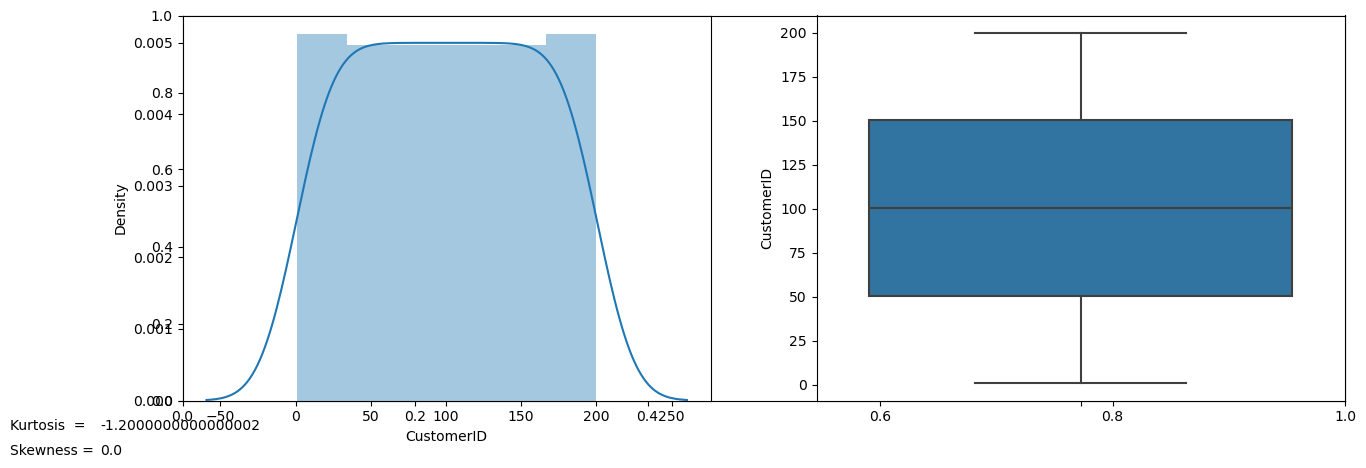

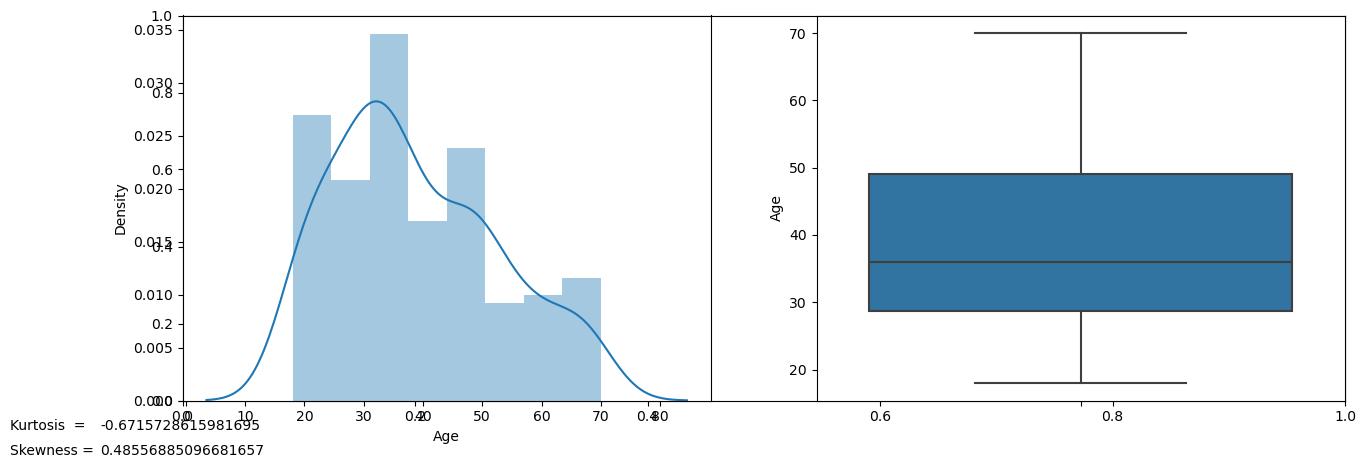

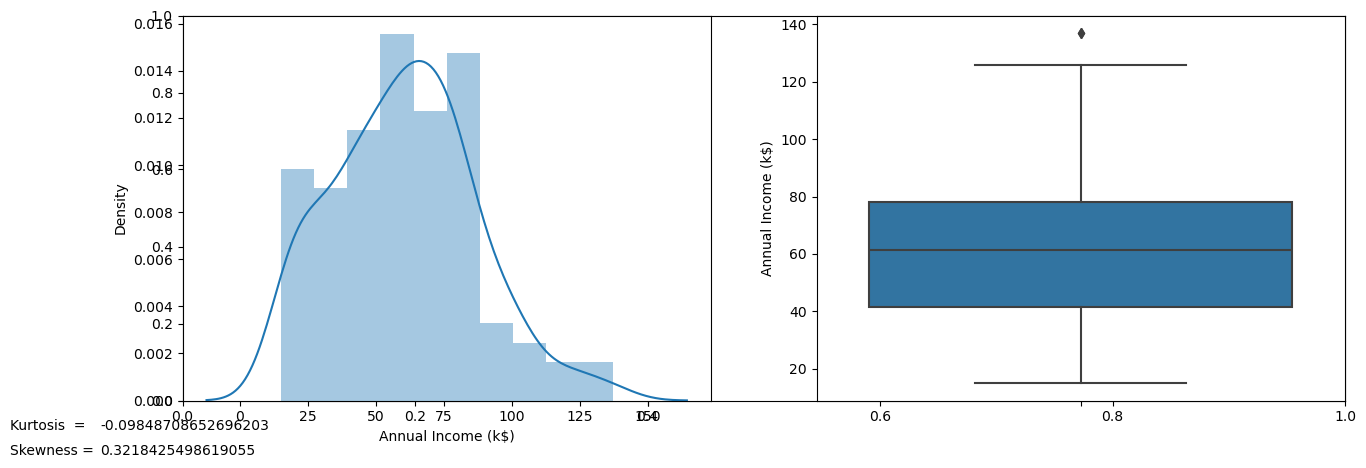

In [8]:
for i in df_num.columns:
    plt.subplots(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(df_num[i])
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_num[i])
    plt.figtext(0.01,0.001, 'Skewness = ')
    plt.figtext(0.07,0.001, df_num[i].skew())
    plt.figtext(0.01,0.05, 'Kurtosis  =')
    plt.figtext(0.07,0.05, df_num[i].kurt())
    plt.show()

In [8]:
df_cat=df[['Age']]

Age


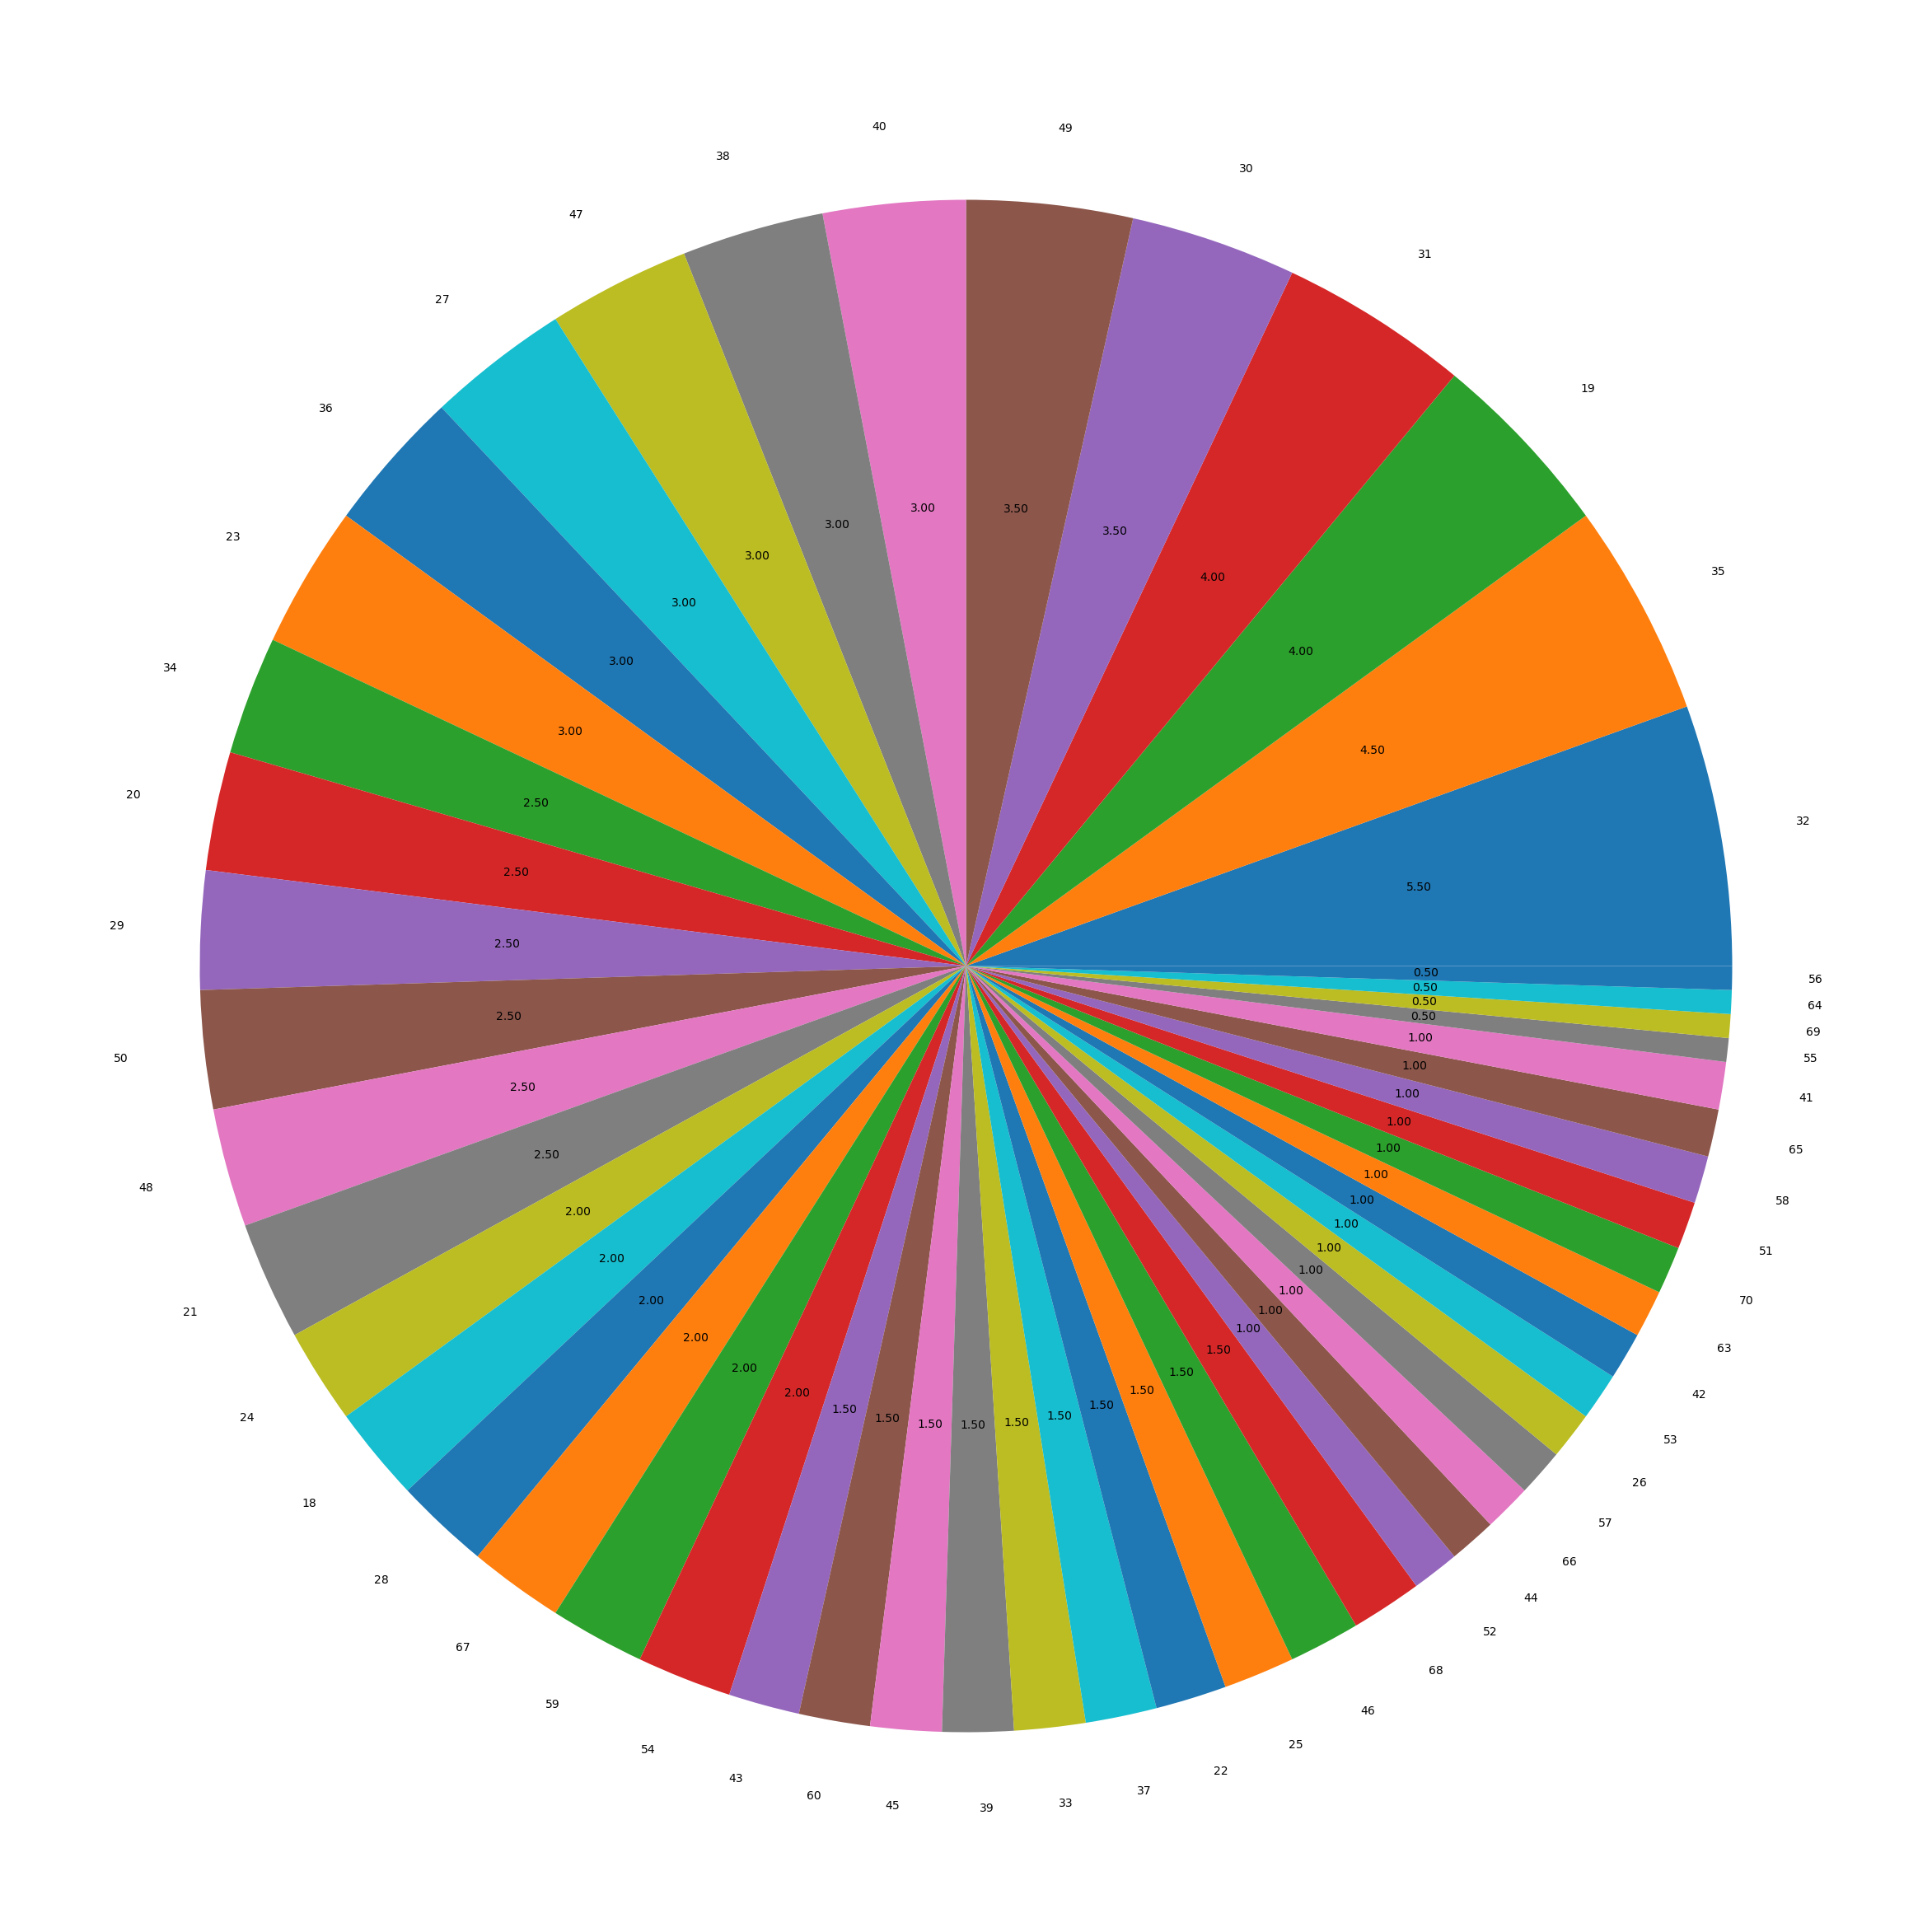

In [9]:
for i in df_cat:
    print(i)
    plt.figure(figsize=(30,40))
    z=df_cat[i].value_counts()/len(df_cat)*100
    plt.pie(z,autopct="%.2f",labels=z.index)
    plt.show()

# BIVARIANT ANALYSIS

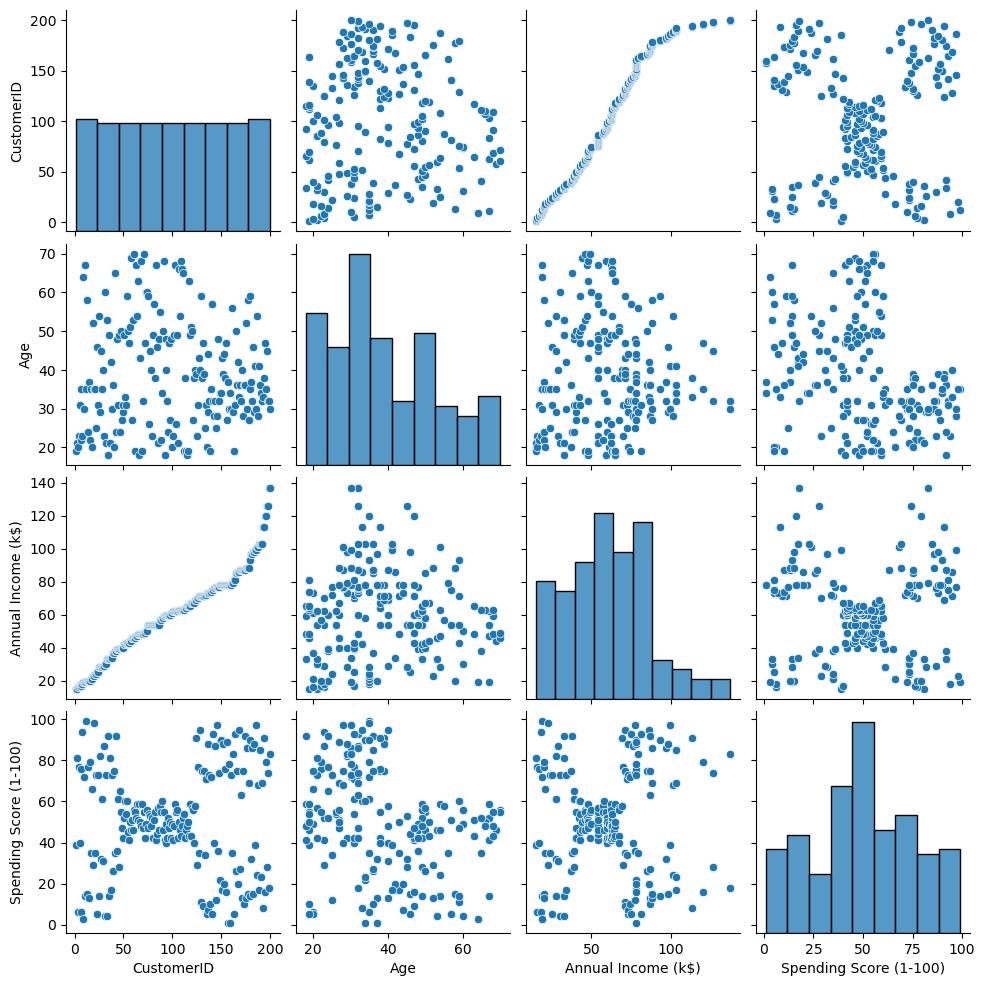

In [11]:
sns.pairplot(df)

# DATA PREPROCESSING

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

there are no null values present in the data

In [11]:
df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


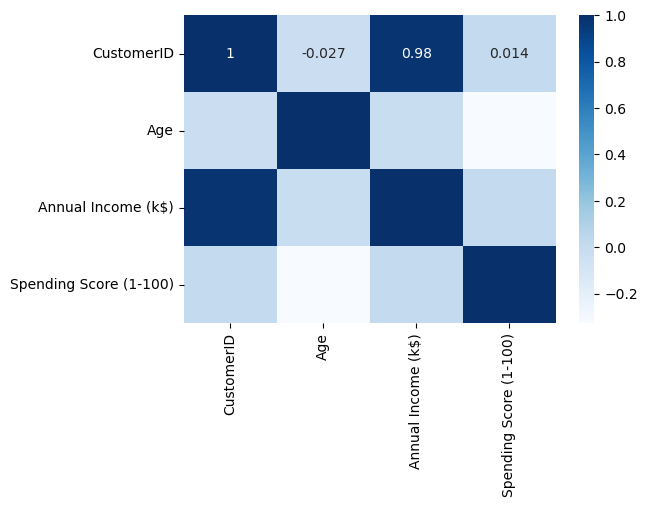

In [12]:
# visualizing the correlation

plt.figure(figsize=(6,4))
sns.heatmap(df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True,cmap='Blues')
plt.show()

# FEATURE SELECTION

In [13]:
# Dropping unimportant columns

df.drop(columns=['CustomerID'],inplace=True)

In [14]:
# Encoding the categorical variables to get the insigts form the categorical variable

In [15]:
df=pd.get_dummies(df,drop_first=True,dtype='int')

In [16]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# SCALLING THE DATA

In [46]:
ss=StandardScaler()
df_scal=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [47]:
df_scal.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [48]:
df_scal.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,3.108624e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00


# USING PCA FOR DIMENSION REDUCTION

We are using PCA to reduce the dimensions as there is multicolinearity present among the independent variables and all the variables are numeric.

In [50]:
pca=PCA()
pca.fit_transform(df_scal)

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00,
         1.33552903e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00,
         8.23287388e-02],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01,
         2.17438112e+00],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01,
         7.52284957e-02],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01,
         6.83070448e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01,
         1.53191637e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01,
         1.41185800e+00],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01,
        -3.91407991e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00,
         3.55576076e-02],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01,
        -1.44050713e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00,
        -4.18453647e-01],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01,
      

In [51]:
eigen_value=pca.explained_variance_
eigen_value

array([1.35437369, 1.05449828, 0.93510105, 0.67612749])

In [52]:
eigen_vector=pca.components_
eigen_vector

array([[ 0.68790025, -0.00608217, -0.68691996,  0.23430156],
       [-0.10368955,  0.7652519 ,  0.10321115,  0.62688553],
       [ 0.12238438,  0.64366712, -0.13657317, -0.74300906],
       [-0.70785859, -0.00672133, -0.70628337,  0.00740532]])

In [53]:
pca_ratio=pca.explained_variance_ratio_
np.cumsum(pca_ratio)

array([0.33690046, 0.5992069 , 0.83181329, 1.        ])

By appling PCA we get to know that near to 95% of the variance is captured by the all 4 components 

In [54]:
pca=PCA(n_components=4)
pca_df=pd.DataFrame(pca.fit_transform(df_scal),columns=['pca1','pca2','pca3','pca4'])
pca_df.head()

,pca1,pca2,pca3,pca4
0,-0.406383,-0.520714,-2.072527,1.335529
1,-1.427673,-0.367310,-2.277644,0.082329
2,0.050761,-1.894068,-0.367375,2.174381
3,-1.694513,-1.631908,-0.717467,0.075228
4,-0.313108,-1.810483,-0.426460,0.683070


# MODEL APPPLICATION 

In [58]:
wcss=[]
for i in range (2,10):
    km=KMeans(n_clusters=i)
    km.fit(pca_df)
    wcss.append(km.inertia_)
wcss
    

[588.8026767824941,
 494.8037500130461,
 400.6906246967836,
 350.63417045659423,
 275.14752760890167,
 267.4859505723169,
 224.711034230686,
 194.8357345972328]

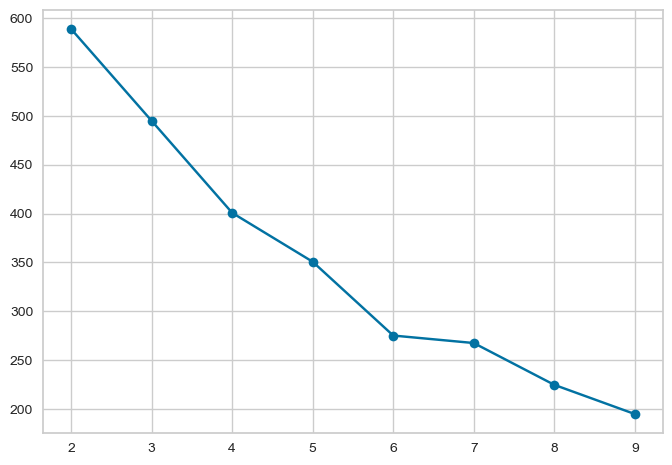

In [60]:
plt.plot(range(2,10),wcss,marker='o')

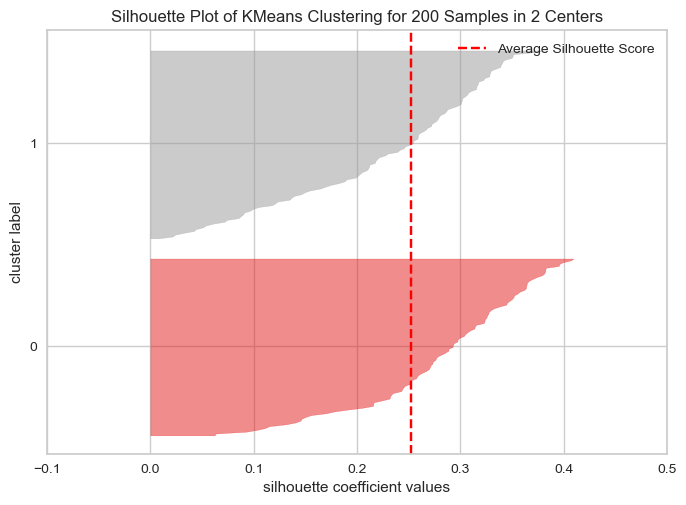

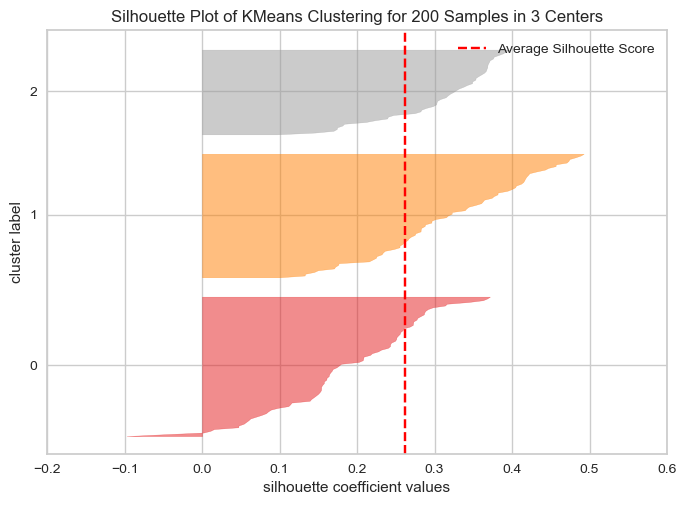

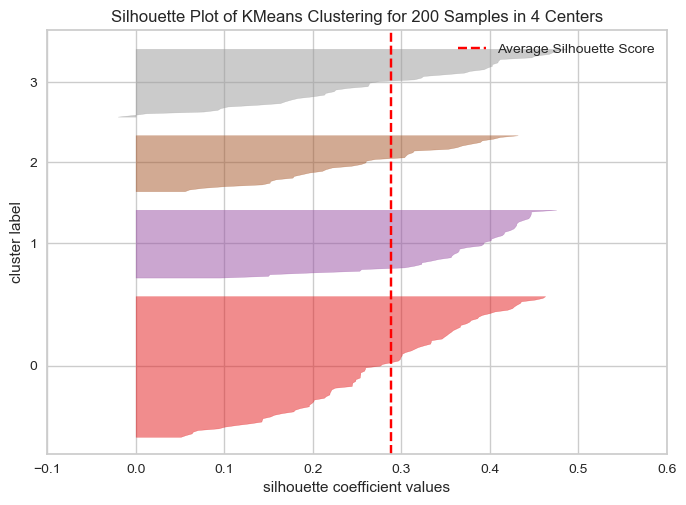

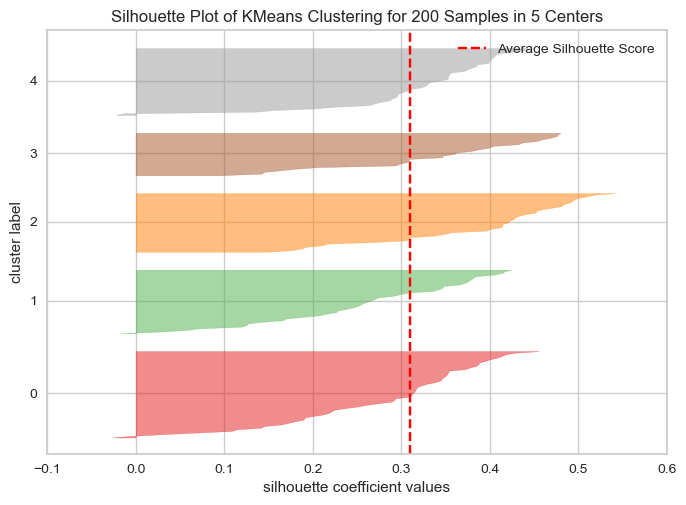

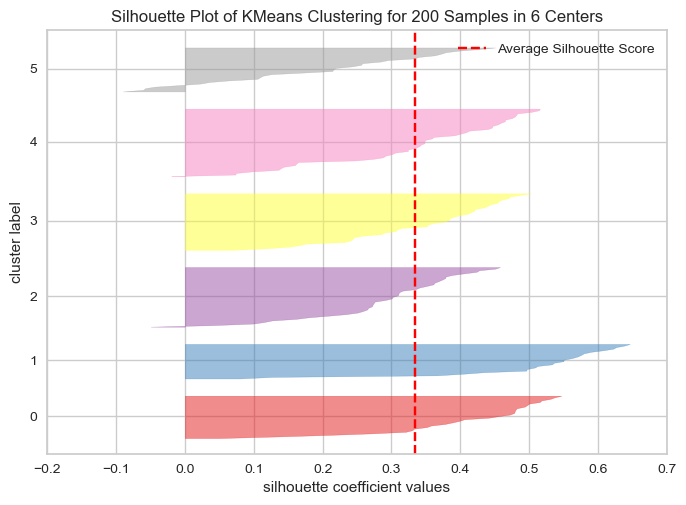

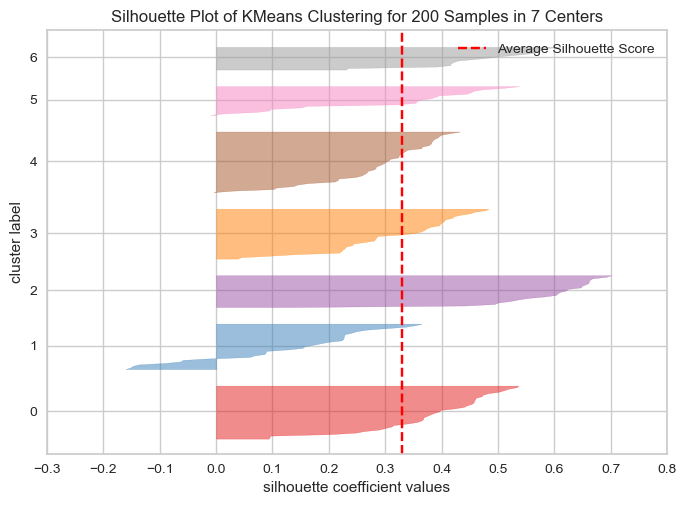

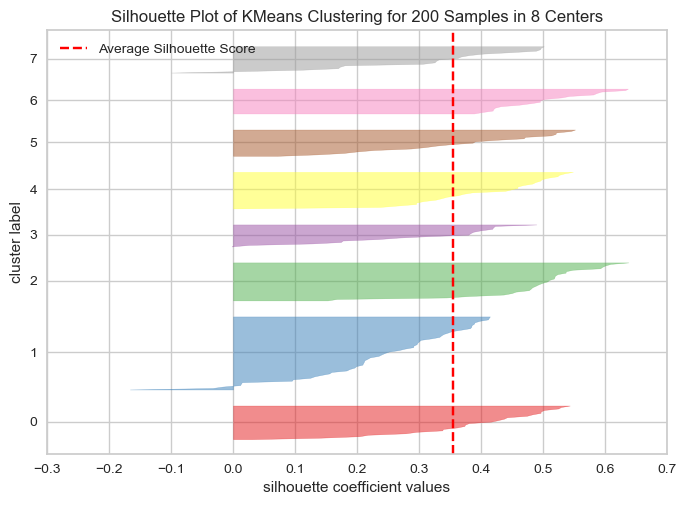

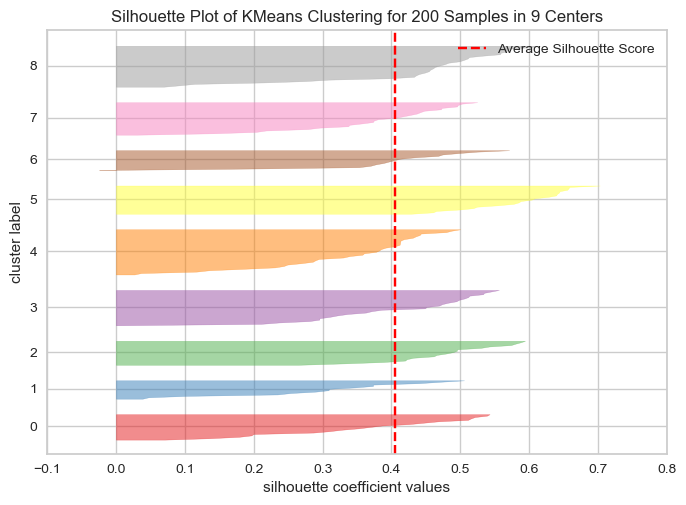

In [61]:
for i in range(2,10):
    silhouette_visualizer(KMeans(i),pca_df)

By referring to both the graphs we can say that number of cluster we can take  can be 5.

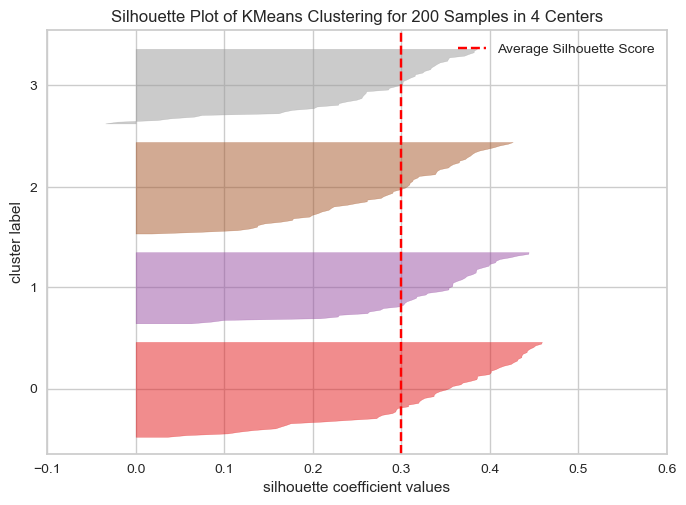

In [107]:
km_3=KMeans(n_clusters=4)
km_3.fit(pca_df)
silhouette_visualizer(KMeans(4),pca_df)
df_scal['cluster']=km_3.labels_
df['cluster']=km_3.labels_

In [92]:
df_scal.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
0,-1.424569,-1.738999,-0.434801,1.128152,3
1,-1.281035,-1.738999,1.195704,1.128152,3
2,-1.352802,-1.700830,-1.715913,-0.886405,3
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,3


In [93]:
df_scal['cluster'].value_counts()

cluster
1    58
3    54
2    49
0    39
Name: count, dtype: int64

# SCORING

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [94]:
silhouette_score(df_scal.iloc[:,[0,1]], df_scal['cluster'])

0.1487129251365015

# EVALUATING THE QUALITY OF THE CLUSTERS FORMED

In [105]:
x=df_scal.drop('cluster',axis=1)
y=df_scal['cluster']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=100,stratify=y)
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)
pred_proba=dt.predict_proba(xtest)[:1]
print('confusion_matrix \n',confusion_matrix(ytest,pred))
print('classification_report \n',classification_report(ytest,pred))

confusion_matrix 
 [[10  0  0  0]
 [ 0 15  0  0]
 [ 0  0 11  1]
 [ 0  1  0 12]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12
           3       0.92      0.92      0.92        13

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



After fitting the model we can see that the accuracy of the model is 96% which is a good score.

In [109]:
df[df['cluster']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,54.0,24.907407,5.349197,18.0,20.25,23.5,29.75,35.0
Annual Income (k$),54.0,39.666667,17.038248,15.0,23.25,39.5,56.25,67.0
Spending Score (1-100),54.0,61.203704,18.420026,6.0,49.25,58.0,74.50,99.0
Gender_Male,54.0,0.388889,0.492076,0.0,0.00,0.0,1.00,1.0
cluster,54.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [110]:
df[df['cluster']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,58.0,47.224138,10.355172,23.0,40.25,47.0,53.50,68.0
Annual Income (k$),58.0,61.120690,24.059194,18.0,44.75,60.0,74.50,126.0
Spending Score (1-100),58.0,35.775862,15.897747,5.0,23.25,40.0,48.75,59.0
Gender_Male,58.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
cluster,58.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [111]:
df[df['cluster']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49.0,49.204082,13.977630,19.0,40.0,48.0,59.0,70.0
Annual Income (k$),49.0,62.244898,24.467266,19.0,46.0,62.0,78.0,137.0
Spending Score (1-100),49.0,29.734694,19.417320,1.0,12.0,35.0,47.0,60.0
Gender_Male,49.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
cluster,49.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [112]:
df[df['cluster']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
Gender_Male,39.0,0.461538,0.505035,0.0,0.0,0.0,1.0,1.0
cluster,39.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


# CONCLUSION

By analysing the customers data, we found some insights which are as follows:

1.Most of the customers whose age is below 32 spend More and vice-versa.
2.Female customer's Spending Score is More than Male customer's.
3.There are 5 types of customers: 
1. Low Annual Income - High Spending Score 2. Low Annual Income - Low Spending Score 3. Medium Annual Income - Medium Spending Score 
4. High Annual Income - High Spending Score

# Strategy

i. As we see, Female customers are spending more, so we can target them and offer them attractive offers and coupons to make them spend even more.

ii. As we observe, the 1st group of customers with Low Annual Income and High Spending Score, can be our easy target and with only some effort from our end we can make them spend even more than what they doing now.

iii. We can also target the 5th group of customers with High Annual Income and High Spending Score, with exclusive offers and outstanding service to spend more.

iv. We should put more efforts into the 4th group of customers with High Annual Income and Low Spending Score, as this group of customers are our potential target which the money to spend more but just needs a little push and outstanding advertisement to converge into our Highest Spending Group.

v. Last but not the least, we must study each group of customers spending seperately to offer them customised coupons and discounts so as to converge them to spend more.